In [143]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data)
ridedata_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_data = pd.merge(citydata_df, ridedata_df, on="city")



# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [124]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

In [125]:
# having two equal signs is comparison versus assigning a variable
# variable is saying go into pyber data, go into type, and get everything with exactly "urban"
urban_cities = pyber_data[pyber_data["type"]=="Urban"]
suburban_cities = pyber_data[pyber_data["type"]=="Suburban"]
rural_cities = pyber_data[pyber_data["type"]=="Rural"]

print(urban_cities.head())





          city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850


## Bubble Plot of Ride Sharing Data

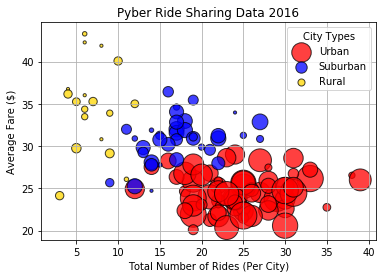

In [126]:
# Obtain the x and y coordinates for each of the three city types

# Ride number by city type
urban_ride_number = urban_cities.groupby(["city"]).count()["ride_id"]
suburban_ride_number = suburban_cities.groupby(["city"]).count()["ride_id"]
rural_ride_number = rural_cities.groupby(["city"]).count()["ride_id"]

# Average fare by city type
urban_average_fare = urban_cities.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities.groupby(["city"]).mean()["fare"]

# Driver count by city type
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types

plt.scatter(urban_ride_number, urban_average_fare, marker="o", facecolors="red", edgecolors="black",
           s=10*urban_driver_count, alpha=.75, label='Urban')

plt.scatter(suburban_ride_number, suburban_average_fare, marker="o", facecolors="blue", edgecolors="black",
           s=10*suburban_driver_count, alpha=.75, label='Suburban')

plt.scatter(rural_ride_number, rural_average_fare, marker="o", facecolors="gold", edgecolors="black",
           s=10*rural_driver_count, alpha=.75, label='Rural')
                
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Plot Legend
plt.legend(title=("City Types"), loc="best")


# Incorporate a text label regarding circle size

plt.grid(True)
# Save Figure


In [127]:
# Show plot
plt.show()

## Total Fares by City Type

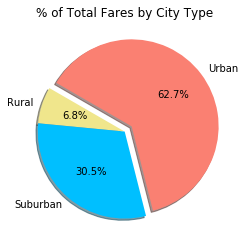

In [128]:
# Calculate Type Percents
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

city_type_fare = pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum() * 100
city_type_fare

plt.pie(city_type_fare, explode=[0,0,.1], labels=["Rural", "Suburban", "Urban"], 
        colors=["khaki", "deepskyblue", "salmon"],
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure


In [129]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

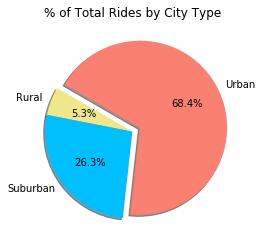

In [130]:
# Calculate Ride Percents
city_type_ride = pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count() * 100
city_type_ride

# Build Pie Chart
plt.pie(city_type_ride, explode=[0,0,.1], labels=["Rural", "Suburban", "Urban"], 
        colors=["khaki", "deepskyblue", "salmon"],
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")
       
# Save Figure


## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

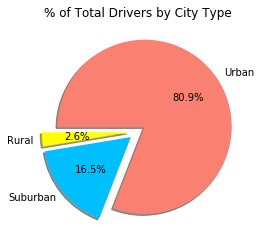

In [162]:
# Dedupe the driver count part in order to perform the driver percents
new_pyber = pyber_data.loc[:, ["city", "driver_count", "type"]]
deduped_pyber = new_pyber.drop_duplicates()


# Calculate Driver Percents
city_type_drivers = deduped_pyber.groupby(["type"]).sum()["driver_count"] / pyber_data["driver_count"].sum() * 100
city_type_drivers


# Build Pie Charts
plt.pie(city_type_drivers, explode=[.1,.1,.1], labels=["Rural", "Suburban", "Urban"],
        colors=["yellow", "deepskyblue", "salmon"], autopct="%1.1f%%", shadow=True, startangle=180)


plt.title("% of Total Drivers by City Type")

# Save Figure


